# Descriptive Statistics Problems

## Exercise 1 – How long are movie titles?

In this exercise, you will apply descriptive statistics techniques to a real dataset: a database of 1000 popular movies from the IMDb website.

From the title of each movie, you will:
- Calculate the title length (in characters).
- Obtain key statistical metrics: mean, median, mode, range, variance, standard deviation, skewness, and kurtosis.
- Identify the longest and shortest titles.
- Visualize the distribution of these lengths with a histogram and a density curve.


In [100]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
from random import randint


# Load IMDb dataset
url = "../datasets/imdb_1000.csv"
df_raw = pd.read_csv(url)
df_raw.sample(10)

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
617,7.7,Despicable Me,PG,Animation,95,"[u'Steve Carell', u'Jason Segel', u'Russell Br..."
966,7.4,The Simpsons Movie,PG-13,Animation,87,"[u'Dan Castellaneta', u'Julie Kavner', u'Nancy..."
289,8.1,All Quiet on the Western Front,UNRATED,Drama,136,"[u'Lew Ayres', u'Louis Wolheim', u'John Wray']"
137,8.3,The Bridge on the River Kwai,PG,Adventure,161,"[u'William Holden', u'Alec Guinness', u'Jack H..."
644,7.7,Philadelphia,PG-13,Drama,125,"[u'Tom Hanks', u'Denzel Washington', u'Roberta..."
749,7.6,Lone Survivor,R,Action,121,"[u'Mark Wahlberg', u'Taylor Kitsch', u'Emile H..."
829,7.5,Elizabeth,R,Biography,124,"[u'Cate Blanchett', u'Geoffrey Rush', u'Christ..."
229,8.1,Strangers on a Train,APPROVED,Crime,101,"[u'Farley Granger', u'Robert Walker', u'Ruth R..."
948,7.4,Frances Ha,R,Comedy,86,"[u'Greta Gerwig', u'Mickey Sumner', u'Adam Dri..."


In [101]:
# Copy of raw data
df = df_raw.copy()

In [102]:
# Create a new column called 'title_length' with the length (number of characters) of each title
df['title_length'] = df['title'].apply(len)

df['title_length'].sample(10)

260    14
589    13
756     5
507    10
218    12
328    25
472    28
428     8
293     9
458     8
Name: title_length, dtype: int64

In [103]:
# Calculate mean, median, and mode of the 'title_length' column
title = df['title_length']

mean = title.mean()
median = title.median()
mode = title.mode()[0]

print(f"The mean is: {round(mean, 2)}")
print(f"The median is: {median}")
print(f"The mode is: {mode}")

The mean is: 15.48
The median is: 14.0
The mode is: 12


In [104]:
# Calculate the range, variance, and standard deviation of 'title_length'
range = max(title) - min(title)
var = np.var(title)
std = np.std(title)

print('The range is: ', range)
print('The variance is: ', round(var, 2))
print('The standard deviation is: ', round(std, 2))


The range is:  67
The variance is:  72.03
The standard deviation is:  8.49


In [105]:
# Calculate skewness and kurtosis of the 'title_length' column
skewness = skew(title)
kurt = kurtosis(title)

print('The skewness is: ', round(skewness, 2)) # Positive skewwness means rigth skewed
print('The kurtosis is: ', round(kurt, 2)) # Kurtosis > 3 means leptokurtic

The skewness is:  1.52
The kurtosis is:  3.79


In [106]:
# Print the shortest and longest title based on their length
title_sorted = df.sort_values(by='title_length', ascending=True)['title'].reset_index()

# Titles sorted has the index and the 'title' column, 'title' has index 1
print('The shortest title is: ', title_sorted.iloc[0, 1])
print('The longest title is: ', title_sorted.iloc[-1, 1])


The shortest title is:  M
The longest title is:  Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


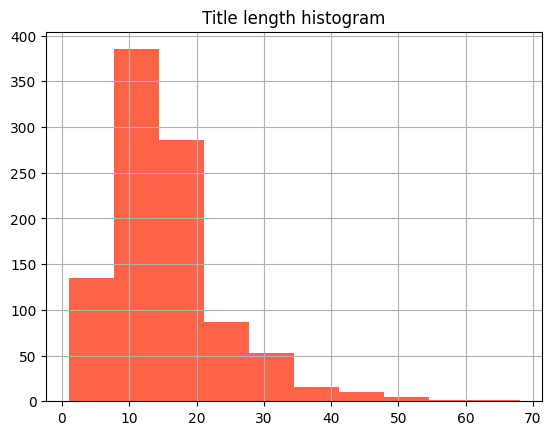

In [107]:
# plot your results
df.hist(column='title_length', color='tomato')
plt.title('Title length histogram')
plt.show()


## Insights
- The median title length is 14 characters, and the mean is 15.48 characters. Since the mean is greater than the median, this indicates a sligth right skew.
- As observed in the graph, most titles fall between 10 and 20 characters long, however, to be 100% sure, the IQR is the best metric.
- The shortes title is 1 character long, while the longest is 68 characters, these are the outliers. 
- The distribution is **right-skewed**, meaning most movie titles are relatively short in length, while other unusually long titles pull the mean upward. 
- The distribution is **leptokurtic**, indicating a shaper peak compared to the normal distribution.

---

## Exercise 2 – Manual Calculation of Standard Deviation

In this exercise, you will manually calculate the standard deviation by selecting five actual titles from the movie dataset you loaded earlier.


In [108]:
# Create a list with 5 actual values from df['title_length'], for example: [10, 13, 14, 18, 22]
random_titles_length = np.random.choice(df['title_length'], size=5).tolist()

random_titles_length


[18, 18, 21, 5, 18]

In [114]:
# Calculate the mean of the 5 values
mean = np.mean(random_titles_length)
print('The mean is:', mean)


The mean is: 16.0


In [115]:
# Calculate the squared differences with respect to the mean
sqr_differences = [float(round(((x - mean) ** 2), 2)) for x in random_titles_length]

sqr_differences


[4.0, 4.0, 25.0, 121.0, 4.0]

In [116]:
# Calculate the variance (average of the squared differences) and its square root to obtain the standard deviation
from math import sqrt

variance = np.mean(sqr_differences)
std = sqrt(variance)

print('The variance is: ', variance)
print('The standard deviation is: ', std)


The variance is:  31.6
The standard deviation is:  5.621387729022079


In [117]:
# Testing
var = np.var(random_titles_length)
std = np.std(random_titles_length)
print(var, std)


31.6 5.621387729022079
